# *Don't get kicked* - Machine Learning Classification Problem
Projekt realizowany w ramach przedmiotu *Warsztaty Badawcze*, kierunku Inżynieria i Analiza Danych na wydziale Matematyki i Nauk Informacyjnych Politechniki Warszawskiej, pod opieką merytoryczną mgr inż. **Mateusza Chilińskiego**.

Autorzy: **Maciej Borkowski, Mateusz Kubita, Tymoteusz Kwieciński**

# Cel zadania i problem biznesowy

Naszym zadaniem biznesowym zostało przygotowanie modelu uczenia maszynowego, który pozwoliłby kategoryzować używane samochody sprzedawane na giełdzie aut. Samochody miały zostać przyporządkowane do jednej z dwóch kategorii - *bezpieczny zakup* oraz *nieopłacalny zakup* - w środowisku handlarzy aut na takie samochody mówi się *cytryny* (z ang. *lemon*).

Zadanie zostało zaproponowane w formie zawodów w serwisie *kaggle*. Niestety, w momencie kiedy dołączyliśmy do zawodów, nie można było składać nowych rankingowych zgłoszeń, a jedynie porównywać swoje wyniki do zbioru testowego za pomocą algorytmu serwisu. Link do zawodów: [https://www.kaggle.com/competitions/DontGetKicked](https://www.kaggle.com/competitions/DontGetKicked).

Nasza ocena, czy sprzedawany samochód jest zakupem nieopłacalnym, miała być dokonywana na podstawie różnych jego cech uporządkowanych w formie tabelarycznej. Algorytm wyuczony na przygotowanych danych treningowych miałby później służyć do wykrywania ryzykownych zakupów w trakcie prowadzenia aukcji. Wobec tego przyjeliśmy dwa główne założenia, które powinien spełniać tak wytrenowany przez nas model:
1. model powinien być w miarę możliwości **wyjaśnialny** - uznaliśmy, że nie byłoby wskazane, aby model używany przez sprzedawców był tak zwaną *czarną skrzynką*, po prostu wypluwającą oceny na podstawie nieznanych przesłanek. W wielu przypadkach sprzedaż samochodów opiera się na intuicji oraz wieloletnim doświadczeniu w zawodzie sprzedawcy.
2. ważniejsze dla nas jest **wykrycie nieopłacalnych zakupów** - nadmierne przyporządkowanie do kategorii fałszywie pozytywnych nie byłoby aż tak bardzo kosztowne dla naszych klientów. Jest to w miare logiczna obserwacja, bo w takich przypadkach lepiej dmuchać na zimne i zakwalifikować więcej ryzykownych samochodów, które potencjalnie nasz klient może kupić, do kategorii *nieopłacalny zakup*. W przypadku zakupu samochodu bardzo ryzykownego, handlarz auto może nie tylko nie zarobić, ale również stracić duże pieniądze.

Naszym celem wobec tego nie było jedynie uzyskanie jak najlepszych rezultatów w zawodach, ale również przygotowanie modelu, który miałby zastosowanie w rzeczywistości.

Z tak zdefiniowanymi celami przeszliśmy do wstępnej, eksploracyjnej analizy dostarczonych nam danych zawierających informacje o zakupionych samochodach w przeszłości, a także do ich preprocessingu.

# Eksploracyjna analiza danych oraz preprocessing

Nasz zbiór danych zawiera 33 kolumny, co wiązało się z dość obszernym preprocessingiem. Do każdej kolumny podeszliśmy indywidualnie, zarówno podczas analizy danych i preprocessingu - odpowiednio transformując jej wartości, dostosowując do algorytmów uczenia maszynowego.

Na podstawie eksploracji danych (m.in. wizualizacji rozkładów, analizy korelacji i przeglądu kategorii) wybraliśmy podzbiór kolumn zawierający jak najwięcej kluczowych informacji i jednocześnie prostych do zakodowania, utworzyliśmy ponadto nowe kolumny wyciągając istotne informacje z pozostałych, takie jak pora roku, w której samochód został zakupiony, liczba drzwi czy rodzaj nadwozia.

Dokonaliśmy imputacji braków danych różnymi metodami - średnią, medianą, tworząc oddzielną kategorię czy zaznaczając tę informacje w nowej kolumnie.

W przypadku kolumn kategorycznych zazwyczaj decydowaliśmy się na użycie algorytmu `OneHotEncoding` z pakietu `scikit-learn`. Jest to dość intuicyjna metoda, dzięki której nie tracimy żadnych informacji. Dodaje on do zbioru danych dodatkowe kolumny (ich liczność jest odpowiednia liczbą kategorii), a następnie daje wartość 1 tam, gdzie jest odpowiednia kategoria. Sprawia to, że informacje te są zakodowane w postaci liczbowej. Niestety sprawia to również, że dodajemy wiele dodatkowych kolumn, co negatywnie wpływa na interpretowalność modelu i pogarszamy wydajność. Przykładowymi kolumnami kategorycznymi, na których zastosowaliśmy ten algorytm są `TopThreeAmericanName`, `WheelTypeID`,`Nationality`, itd...

Kolejnym ważnym etapem preprocessingu była standaryzacja danych. Zważając na fakt, że budowaliśmy modele które są czułe na skale zmiennych (np. SVM czy regresja logistyczna) musieliśmy wszystkie wartości liczbowe w jakiś sposób przeskalować, aby były między sobą 'porównywalne'. Zastosowaliśmy klasę `StandardScaler`, która odejmuje od każdej wartości średnią arytmetyczną, a następnie dzieli przez wariancję. Przykładowymi kolumnami objętymi tym algorytmem są: `VehOdo`,`VehBCost`, `WarrantyCost`, itd ...

Zbiór danych do budowy dostępnych w witrynie *kaggle* podzieliliśmy przed rozpoczęciem analizy na zbiór treningowy oraz walidacyjny, korzystając ze stratyfikacji targetu - z uwagi na to, że klasa o wartości 1 była niedoreprezentowana, musieliśmy zrobić wszystko, aby podział zbioru był jak najlepszy.
<br />

![class_imbalance](plots/class%20imbalance.png)
<br />

W trakcie dalszej pracy nad projektem, np. już w trakcie budowania modelów wielokrotnie wracaliśmy do etapu preprocesingu, gdyż okazało się, że mamy nowe pomysły na przygotowanie danych lub odkryliśmy nowe, ciekawe zależności w danych. Jedną z najbardziej widowiskowych zmian udało się odnaleźć na etapie [weryfikacji istotności cech](###Ocena-predykcyjności-cech) w modelu lasów losowych. Okazało się, że bardzo istotnym elementem preprocessingu jest odizolowanie braków danych w zmiennej `WheelTypeID` do nowej zmiennej w ramach metody `OneHotEncoding`, gdyż znaczna część obserwacji posiadających brak danych w tej kolumnie była złym zakupem.

# Modele

# Logistic regression
<br />

### Opis działania

Regresja logistyczna służy najczęściej do szacowania prawdopodobieństwa przynależności przykładu do określonej klasy. Jeśli oszacowane prawdopodobieństwo przekracza 50%, to model prognozuje, że próbka ta należy do np. klasy pozytywnej, zaś w przeciwnym przypadku do klasy negatywnej. Podobnie jak w przypadku regresji liniowej w modelu regresji logistycznej wyliczana jest ważona suma cech wejściowych. Nie są jednak wyświetlane bezpośrednie wyniki, lecz rezultat tzw. funkcji logistycznej.
<br />

### Przygotowanie modelu

Pierwszy wytrenowany model uzyskał wynik 89.5% dokładności oraz 70.95% precyzji na zbiorze walidacyjnym. Bardzo podobne rezultaty otrzymaliśmy na zbiorze treningowym, więc model nie przejawia oznak przetrenowania. Nie są to jednak bardzo zadowalające wyniki.

Przetestowaliśmy również parametr class_weight z wartością 'balanced' ze względu na niezbalansowany charakter zmiennej objaśnianej, jednak pogorszyło to rezultaty modelu.

Następnie zajęliśmy się regularyzacją modelu regresji logistycznej - wyboru regresji grzbietowej lub regresji metodą LASSO oraz najlepszego współczynnika regularyzacji C za pomocą przeszukiwania siatki hiperparametrów na podstawie dokładności. Regularyzacja nieznacznie poprawiła rezultaty modelu.

Znaczną poprawę prezycji do 75.56% otrzymaliśmy stosując wielomianową regresję drugiego rzędu, ponadto model ten osiągnął najlepszy rezultat gini.

![reg_coef](plots/reg_confusion.png)

<br />

### Wizualizacje

Współczynnik istotności cech funkcji decyzyjnej pozwala nam zaobserwować, które kolumny miały największe znaczenie przy podejmowanej przez model dezycji:

![reg_coef](plots/reg_coef.png)

Dane pochodzą z modelu reularyzowanego za pomocą grid search. Obserwujemy, że największe znaczenie w modelu miał brak informacji o typie opon samochodu, a następnie informacja, czy na samodchód będzie większy popyt. Widać, że model wyraźnie 'skupiał się' również na niektórych markach samochodów.

Najlepsze rezultaty gini oraz krzywe roc osiągnął model wielomianowej regresji:

Dla danych treningowych: gini = 0.6167

![reg_coef](plots/reg_roc_train.png)

Dla danych walidacyjnych: gini = 0.5217

![reg_coef](plots/reg_roc_val.png)

<br />

### Podsumowanie

Ostatecznie musimy przyznać, że rezultaty osiągane przez regresję logistyczną nie są bardzo zadowalające. Stanowią natomiast dobrą podstawę do wykorzystania w klasyfikatorze głosującym.

# Decision tree
<br />

### Opis działania

Algorytm drzewa decyzyjnego polega na tworzeniu modelu predykcyjnego w formie struktury drzewa. Na początku, na podstawie dostępnych danych treningowych, algorytm szuka najlepszego podziału zbioru danych na podstawie wybranych cech. Następnie, na podstawie kryteriów decyzyjnych, takich jak entropia czy wskaźnik Giniego, tworzona jest struktura drzewa, gdzie wierzchołki reprezentują decyzje, a krawędzie oznaczają możliwe wartości cech. Ostatecznie, drzewo decyzyjne może być wykorzystane do klasyfikacji nowych, nieznanych danych poprzez przechodzenie przez strukturę drzewa na podstawie wartości cech tych danych.
<br />


### Przygotowanie modelu

Pierwszy przygotowany model drzewa decyzyjnego bez regularyzacji hiperparametrów został przetrenowany - model dopasował się idelanie do danych treningowych.

Dokonaliśmy przeszukiwania siatki hiperparametrów: maksymalnej głębokości, maksymalnej liczbie cech uwzględnianej przy popdziale, minimalnej liczbie próbek znajdującej się w liściu oraz minimalnej liczbie próbek, jakie muszą znajdować się w węźle przed podziałem. Do przeszukiwania siatki wykorzystaliśmy klasę `RandomizedSearchCV` ze skupieniem się ponownie na znajdowaniu najlepszej dokładności.

Rezultaty regularyzacji okazały się satysfakcjonujące, uzyskaliśmy 89.95% dokładności oraz 81.46% precyzji na zbiorze walidacyjnym, natomiast w tym przypadku model się nie przetrenowuje.

![reg_coef](plots/dct_confusion.png)

<br />

### Wizualizacje

Atrybut feature_importance drzewa decyzyjnego pozwala nam określić, jak bardzo poszczególne cechy przyczyniają się do podejmowania decyzji w modelu. W regularyzowanym modelu drzewa decyzyjnego wyraźnie kluczową cechą okazał się brak danych dla typu koła:

![reg_coef](plots/dct_feature_importance.png)

Niestety dla drzewa decyzyjnego nie otrzymujemy zatysfakcjonującego wyniku gini i krzywych roc:

Dla danych treningowych: gini = 0.4644

![reg_coef](plots/dct_roc_train.png)

Dla danych walidacyjnych: gini = 0.4343

![reg_coef](plots/dct_roc_val.png)
<br />

### Podsumowanie

W porównaniu do modelu regresji logistycznej otrzymaliśmy podobną dokładność i dużo lepszą precyzję stosujac drzewo decyzyjne. Dużo gorzej jednak wypadł wynik gini. Ponownie będziemy mogli wykorzystać rezultaty z drzewa decyzyjnego przy klasyfikatorze głosującym.



# KNN classifier
<br />

### Opis działania 

Algorytm KNN Classifier polega na klasyfikowaniu nowej próbki poprzez porównanie jej z `k` najbliższymi sąsiadami ze zbioru treningowego na podstawie obliczonych odległości (np. euklidesowej) między nimi. Decyzję o przyporządkowaniu nowej obserwacji do klasy najczęściej podejmuje się na podstawie głosowania większościowego lub najkrótszych odległości między centroidami.
<br />

### Przygotowanie modelu
Po wykonaniu hiperparametryzacji za pomocą metody grid search sprawdziliśmy jak sprawuje się model na wydzielonym zbiorze walidacyjnym.

![roc curve](plots/KNN_roc.png)

Krzywa ROC dla modelu KNN, na zbiorze walidacyjnym.


Niestety jak się okazało, model nie sprawuje się zbyt dobrze. Otrzymana wartość indeksu gini dla zbioru walidacyjnego to zaledwie `0.3332`.
<br />

### Redukcja wielowymiarowości

Model KNN sprawuje się dużo gorzej przy wielu wymiarach. W związku z tym postanowiliśmy zredukować liczbę wymiarów naszego zbioru danych. Z pomocą przyszedł nam algorytm PCA, który zastosowaliśmy do tego zadania.

Po odpowiednim przygotowaniu danych postanowiliśmy wybrać liczbę wymiarów do której ten algorytm będzie skalować nasze danę, aby zachować dostatecznie dużo informacji, przy jednoczesnej redukcji wymiarów. W związku z tym ustaliliśmy, że należy ograniczyć liczbę wymiarów tak aby łączna wariancja miała wartość co najmniej 95%.

![pca](plots/PCA_variance.png)


Ustatliliśmy docelową liczbę wymiarów jako 31 - co wydawało się rozsądnym balansem pomiędzy utratą informacji, a redukcją wymiarów. Zbiór danych w wyniku preprocessingu uwzględniającego m.in. One-Hot encoding, a także innych operacji zwiększające liczbę wymiarów danych spowodowały, że ramka zawierała 103 wymiary.

Okazało się jednak, że zastosowana redukcja wymiarów nie przyniosła satysfakcjonujących rezultatów, w kwestii wydajności modelu gdyż model po redukcji wymiarów sprawował się gorzej niż przed, co widać na załączonym wykresie krzywej ROC.

![roc curve](plots/KNN_pca_roc.png)

Wskaźnik gini spadł do około `0.25`, co wydawało nam się całkiem sporą różnicą. Zdecydowaliśmy, że model nie sprawował się lepiej od tego przed zastosowaniem PCA, chyba że wziąć pod uwagę czas jego działania. Algorytm KNN operujący na zmodyfikowanym zbiorze danych działał szybciej, ale przyspieszenie algorytmu nie było naszym celem.
<br />

Macierz pomyłek dla modelu przed redukcją wymiarów:

![conf_knn](plots/KNN_confusion.png)


Wynik algorytmu na danych testowych z kaggla:

![knn_res](plots/KNN_res.png)
<br />

### Podsumowanie
**Ogólnie model ten poradził sobie raczej słabo**. Mimo zastosowanej operacji, takich jak strojenie hiperparametrów, czy redukcja wymiarów nie poprawiły one ostatecznej jakości modelu.

# Random forest
<br />

### Opis działania
Jednym z najczęściej używanych modeli w zadaniach uczenia maszynowego jest las lasowy. Opiera się na koncepcji zespołowego uczenia, w którym wiele drzew decyzyjnych jest tworzonych i łączonych w celu uzyskania lepszych wyników. Również postanowiliśmy zaimplementować ten model do rozwiązania tego problemu.
<br />

### Pierwsza implementacja
Przy użyciu standardowych hiperparametrów wytrenenowaliśmy pierwszy model tego typu, jak się okazało sprawował się on znacznie lepiej niż poprzednie modele innych typów:


![roc curve](plots/RF_base_roc.png)

Wartość gini dla tego modelu wynosiła około `0.5`
<br />

### Strojenie hiperparametrów

Przy użyciu podstawowych metod wyszukiwania najlepszych hiperparametrów, takich jak grid oraz random search wytrenowaliśmy model sprawujący się lepiej na danych treningowych. Korzystając z własności lasów losowych wiedzieliśmy, że w tym przypadku nie musimy się znacząco przejmować przetrenowaniem tego modelu, ze względu na odporność lasów losowych na tak zwany *overfitting*.

W trakcie poszukiwania najlepszego modelu za pomocą zestawów hiperparametrów stosowaliśmy różne miary jakości modelów, ale ostatecznie stwierdziliśmy, że modele będą porównywane za pomocą *balanced accuracy*, aby niezbalansowanie klas nie stanowiło aż tak dużego problemu.

Jako jedną z miar jakości otrzymanego w ten sposób modelu zastosowaliśmy ponownie krzywą ROC, pokazującą stosunek czułości (ang. sensitivity) do specyficzności (ang. specificity). 


![roc curve](plots/RF_random_roc.png)

Wartość gini dla tego modelu wynosiła również około 0.5, ale mniej niż w poprzednim przypadku.

Ostatecznie model lasu losowego, który wybraliśmy, miał wartość wskaźnika `accuracy` rzędu ponad 90%. Jednak z uwagi na to, że klasa pozytywna była niezbyt liczna - w naszym zbiorze danych stosunek samochodów, które były złym zakupem do tych, które były dobrym był naprawdę mały. W związku z tym nie był to główny wskaźnik, który braliśmy pod uwagę.
<br />

### Rozwiązanie niedoreprezentowania klasy samochodów uszkodzonych

Ponieważ jedynie 12% samochodów w całym zbiorze danych stanowiło te będące złym zakupem, próbowaliśmy znaleźć rozwiązanie tego problemu na różne sposoby.

Zastosowaliśmy różne metody samplowania danych oraz strojenie hiperparametrów. Rezultaty poprawiły jakość modelu, ale tylko nieznacznie.
<br />



### Ocena predykcyjności cech

W ramach tego modelu sprawdziliśmy również feature importance na dwa sposoby - za pomocą wbudowanej funkcji lasu losowego `feature_importance_`, a także za pomocą pakietu `shapely`.

Jak się okazało najbardziej istotną kolumną predykcyjną była kolumna oznaczająca powiązana z WheelTypeID - zmienną określającą rodzaj kołpaków zamontowanych w samochodzie. Co istotniejsze, nie istnieje żaden konkretny typ kołpaków, który zwiększałby prawdopodobieństwo przynależności samochodu do klasy zakupu narażonego na straty. Jak się okazuje, najwięcej informacji na temat tego czy samochód jest przysłowiową *cytryną* można było wywnioskować z faktu, czy typ kołpaka danego samochodu zawierał brak danych. W zależności od parametrów, predykcyjność takiej kolumny wynosiła nawet do 60%.

Obserwacja ta nie była przez nas początkowo zauważona. Istotne wgłębienie się w problem i dokładne przeanalizowanie danych pozwoliło nam zauważyć przeoczoną, ale bardzo ważną informację dla sprawowania się modelu, co automatycznie zwiększyło predykcyjność wszystkich naszych modelów.

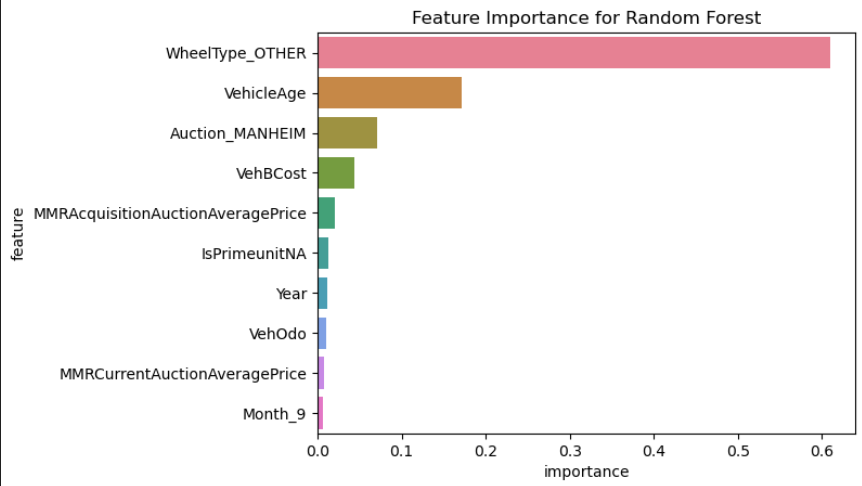

Pozostałymi cechami samochodów, które dawały dużo informacji o tym, czy zakup był dobry lub nie, były między innymi wiek samochodu, jego cena, a także wartość ubezpieczenia auta. 



### Ostateczny wynik na danych z kaggle

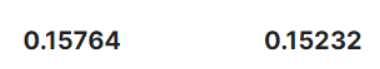

# XGBoost

### Opis działania

XGBoost (eXtreme Gradient Boosting) to potężny algorytm uczenia maszynowego używany do klasyfikacji i regresji. Opiera się na technice gradient boosting, łączącej wiele słabych modeli w celu stworzenia silnego modelu. Działanie XGBoost obejmuje inicjalizację modelu, obliczanie predykcji początkowych, obliczanie reszt, budowę drzewa, aktualizację wag, aktualizację predykcji i kontynuację uczenia. Ostatecznie, model XGBoost generuje predykcje dla nowych danych na podstawie cech tych danych.

### Opis modelu

Zdecydowaliśmy się ponownie użyć grid-search'a, aby znaleźć najlepsze hiperparametry modelu XGboost. \
Jak się okazało najlepszy model przy cross-validation=3 sprawdził się XGBoost z następującymi parametrami: 

{'subsample': 1.0,
 'n_estimators': 150,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 5,
 'colsample_bytree': 1.0}
 
 Dla modelu z powyższymi parametrami obliczyliśmy różne metryki na zbiorze testowym, które przedstawiają się następująco. \
 Dla klasy 0: precision: 0.88, recall: 0.99 \
 Dla klasy 1: precision: 0.39, recall: 0.02 \
 Accuracy: 0.88 \

### Wizualizacje
A jeżeli chodzi o macierz pomyłek to wygląda ona następująco:

![Confusion Matrix](plots/conf-mat-xgboost.png)

A krzywe roc tak:

Dla danych treningowych:

![Roc xgb](plots/roc_train_xgboost.png)

Gini wynosi tutaj 0.61

Dla danych testowych:

![Roc xgb test](plots/roc_test_xgboost.png)

A tutaj wartość gini 0.52


# Voting classifier
<br />

### Opis działania
Klasyfikator głosujący to jedna z technik uczenia zespołowego, która polega na łączeniu predykcji kilku różnych modeli w celu podjęcia końcowej decyzji. Działa na zasadzie głosowania, gdzie każdy model oddaje swój głos na przewidywaną klasę. Istnieją trzy główne typy głosowania: hard voting, soft voting i weighted voting. W hard voting, klasa otrzymująca największą liczbę głosów jest wybierana jako końcowa decyzja. W soft voting, modele przewidują prawdopodobieństwa przynależności do poszczególnych klas, a ostateczna decyzja jest oparta na agregacji tych prawdopodobieństw. W weighted voting, nadawane są wagi poszczególnym modelom, które wpływają na ostateczne głosowanie.
<br />

### Opis modelu

Do głosowania użyliśmy modeli regresji logistycznej, drzewa decyzyjnego, lasu losowego oraz xgboost z wybranymi wcześniej najlepszymi hiperparametrami. W naszym modelu użyliśmy metody soft voting. Za pomocą losowego przeszukiwania siatki wybraliśmy również najbardziej korzystny pod względem dokładności zestaw wag charakteryzujący stosunek istotności głosu każdego modelu w głosowaniu. Nalepsze rezultaty otrzymaliśmy uwzględniając jedynie las losowy oraz xgboost. Wyniki są bardzo zadowalające - 90.09% dokładności oraz 84.08% precyzji dla zbioru walidacyjnego, przy jednoczesnym braku oznak przetrenowania modelu.


![reg_coef](plots/voting_confusion.png)
<br />

### Wizualizacje

Krzywa roc oraz rezultat gini dla zbioru walidacyjnego kształtują się na poziomie modeli lasu losowego i xgboost:

Dla danych treningowych: gini = 0.8682

![reg_coef](plots/voting_roc_train.png)

Dla danych walidacyjnych: gini = 0.5256

![reg_coef](plots/voting_roc_val.png)




## SVM

### Opis działania

SVM (Support Vector Machines) to algorytm uczenia maszynowego, który znajduje optymalną hiperpłaszczyznę separującą dane różnych klas. Działa poprzez wybór hiperpłaszczyzny, wyszukiwanie optymalnej z maksymalnym marginesem, wykorzystanie kernel tricku do przekształcenia danych do przestrzeni separowalnej liniowo lub nieliniowo, optymalizację modelu i klasyfikację nowych danych na podstawie ich położenia względem hiperpłaszczyzny. SVM jest skuteczny dla danych z wieloma cechami i potrafi radzić sobie z danymi nieliniowo separowalnymi.

### Opis modelu

Niestety okazało się, że model ten nie dość, że bardzo długo się trenował, to także słabo się sprawdził. Był to model, którego accuracy można by było porównać do DummyClassifier, ponieważ prawie wszystkie wiersze przydzielał do klasy 1. Z tego też powodu nie załączam tu żadnych więcej metryk, gdyź byłoby to po prostu zbędne. Warto też wspomnieć, że może to mieć coś wspólnego ze skalą cech (mimo że normalizowaliśmy większość kolumn).

## Rozwiązanie niedoreprezentowania klasy samochodów uszkodzonych

Ponieważ jedynie 12% samochodów w całym zbiorze danych stanowiło te będące złym zakupem, próbowaliśmy znaleźć rozwiązanie tego problemu na różne sposoby.

Przetestowaliśmy różne sposoby radzenia sobie z tym problemem pochodzące z książki autorstwa Max Kuhna oraz Kjell Johnson *Applied Predictive Modeling*.

Wśród rozwiązań, które zastosowaliśmy były między innymi odpowiednie strojenie hiperparametrów (za pomocą metod przeszukiwania siatki hiperparametrów i innych), próbowaliśmy w ten sposób zmaksymalizować różne wskaźniki jakości modelów - nie tylko najczęściej stosowane *accuracy*. Ta metoda okazała się jednak nieskuteczna w naszym przypadku.

Innym podejściem, które staraliśmy się zastosować były metody *samplowania* danych. Staraliśmy się modyfikować sztucznie zbiór danych testowych, tak aby proporcje pomiędzy klasami były zrównoważone. 
Stosując tę technikę dla modelu `XGBoost` modele trenowane na upsamplowanych danych okazały się znacznie gorsze niż te trenowane na orginalnych danych.
W przypadku modelów lasów losowych technika SMOTE okazała się poprawiać w pewnym stopniu wyniki modelów na zbiorze walidacyjnym, kosztem jednak znacznie dłuższego czasu potrzebnego do wytrenowania modeli. 

Jak się jednak okazało, wytrenowany las losowy z użyciem SMOTE w konkursie na kagglu osiągnął najlepszy wynik. 


W przypadku XGboosta metoda oversamplingu nie spisała się najlepiej, gdyż wartość test accuracy spadła do 68.35, gdzie w modelu bez oversamplingu wartość ta wynosiła 87.69.

# Podsumowanie

Wykonując testy za pomocą algorytmu *kaggle'a* na zbiorze testowym uzyskaliśmy przyzwoite rezultaty w porównaniu do pozostałych zawodników biorących udział w już zakończonych zawodach. Nasz najlepszy wynik osiągnięty za pomocą modelu lasu losowego dał nam satysfakcjonujący wynik. 

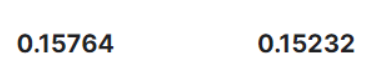

Nie pozwoliłby nam on wygrać zawodów, ale ten uznaliśmy go za bardzo dobry, biorąc pod uwagę nasze doświadczenie w tego typu projektach . Zaczynając pracę nad projektem, żaden z nas nie miał doświadczenia w dziedzinie uczenia maszynowego.

Dzięki temu, w trakcie pracy nad projektem nie tylko udało nam się zbudować wiele modeli i osiągnąć założone cele biznesowe. Udało nam się ustalić, które cechy były najbardziej istotne dla naszych modelów, a co więcej, różne modele zwracały te same wyniki. Co więcej udało się wytrenować las losowy w ten sposób, aby liczba obserwacji False Negative była niewielka. Ostatecznie, co najważniejsze, udało sie nam również sporo się nauczyć.